<a href="https://colab.research.google.com/github/manjimams-2000/Manjimams2000/blob/main/Task__on_Unsupervised_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('/content/fish.csv')

In [8]:
df.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [9]:
df.shape

(84, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [11]:
len(df)

84

In [12]:
null=df.isnull().sum()
null

Bream    0
242.0    0
23.2     0
25.4     0
30.0     0
38.4     0
13.4     0
dtype: int64

In [13]:
null_percentage=(null/len(df)*100)
null_percentage.round(2)

Bream    0.0
242.0    0.0
23.2     0.0
25.4     0.0
30.0     0.0
38.4     0.0
13.4     0.0
dtype: float64

In [14]:
df.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
data = df.dropna()

In [24]:
numerical_cols = df.select_dtypes(include=['number']).columns
data_numerical = df[numerical_cols].dropna()


In [25]:
scaler = StandardScaler()


In [26]:
scaled_data = scaler.fit_transform(data_numerical)

In [28]:
scaled_data = pd.DataFrame(scaled_data, columns=numerical_cols) # Use columns from the numerical data

In [29]:
scaled_data.head()

,242.0,23.2,25.4,30.0,38.4,13.4
0,-0.378631,-0.300355,-0.271601,-0.148349,1.170768,0.444320
1,-0.247179,-0.309220,-0.255175,-0.155929,1.151330,1.058494
2,-0.186710,-0.096460,-0.049862,0.025988,0.976392,0.208099
3,-0.010563,-0.078730,-0.049862,0.063887,0.840329,1.058494
4,0.042018,-0.052135,0.007626,0.116946,1.093017,0.633297


In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

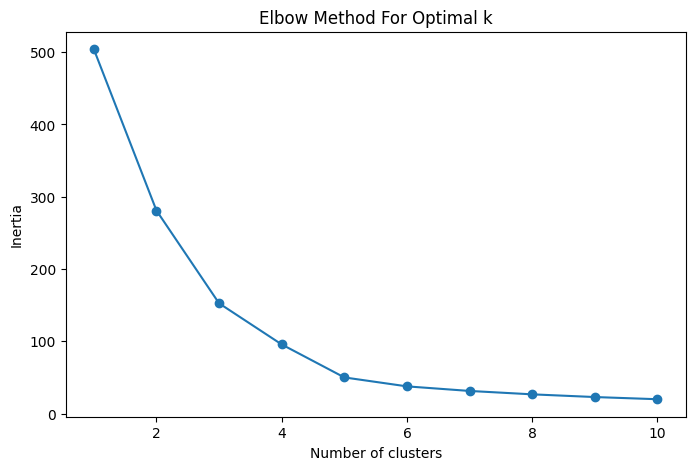

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
import scipy.cluster.hierarchy as sch

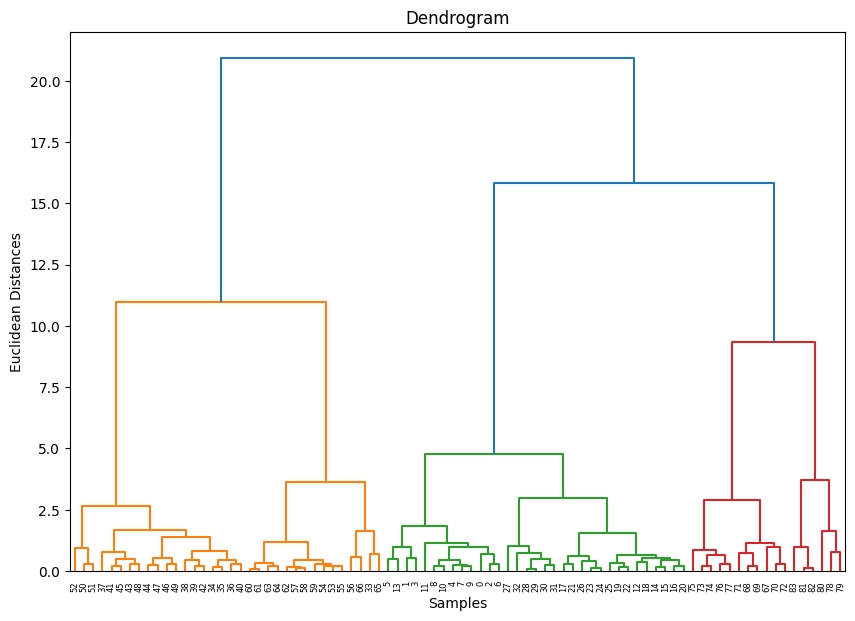

In [34]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
scaled_data['Kmeans_Cluster'] = kmeans_labels

In [37]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_data.drop(columns=['Kmeans_Cluster']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
scaled_data['HC_Cluster'] = hc_labels

In [39]:
scaled_data.head()

,242.0,23.2,25.4,30.0,38.4,13.4,Kmeans_Cluster,HC_Cluster
0,-0.378631,-0.300355,-0.271601,-0.148349,1.170768,0.444320,2,2
1,-0.247179,-0.309220,-0.255175,-0.155929,1.151330,1.058494,2,2
2,-0.186710,-0.096460,-0.049862,0.025988,0.976392,0.208099,2,2
3,-0.010563,-0.078730,-0.049862,0.063887,0.840329,1.058494,2,2
4,0.042018,-0.052135,0.007626,0.116946,1.093017,0.633297,2,2


In [40]:
import seaborn as sns

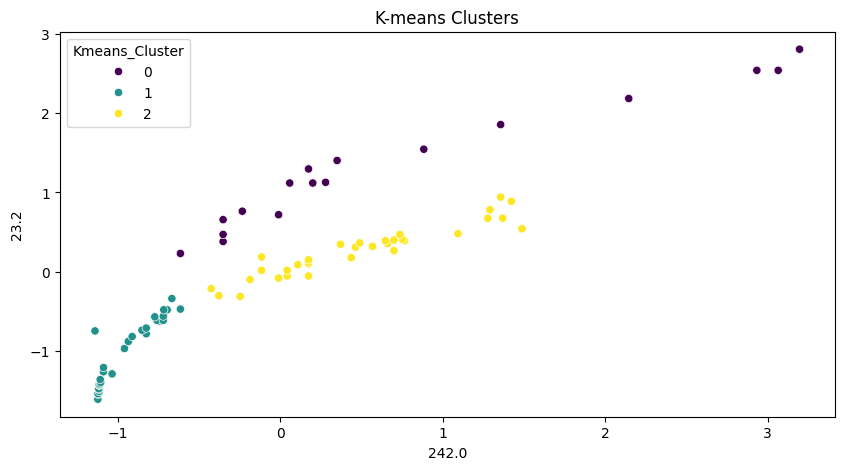

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_data.iloc[:, 0], y=scaled_data.iloc[:, 1], hue=scaled_data['Kmeans_Cluster'], palette='viridis')
plt.title('K-means Clusters')
plt.show()

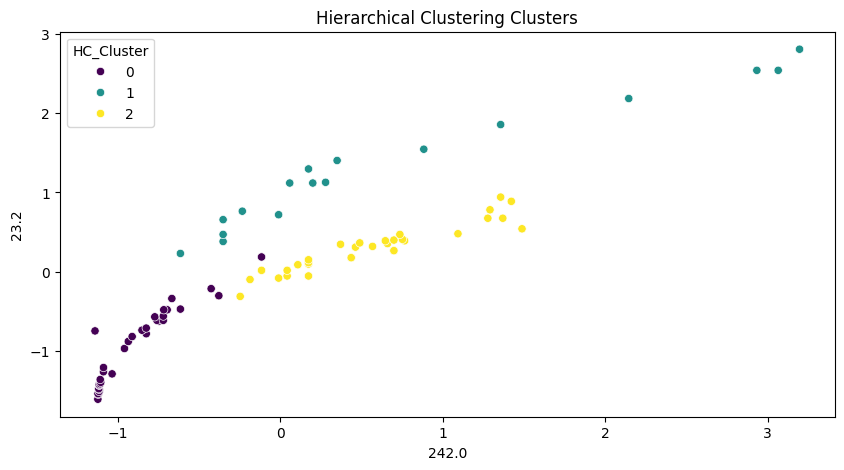

In [42]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_data.iloc[:, 0], y=scaled_data.iloc[:, 1], hue=scaled_data['HC_Cluster'], palette='viridis')
plt.title('Hierarchical Clustering Clusters')
plt.show()